Cloning into 'cChess'...
remote: Enumerating objects: 3601, done.
remote: Counting objects: 100% (3601/3601), done.
remote: Compressing objects: 100% (3573/3573), done.
remote: Total 3601 (delta 63), reused 3563 (delta 28), pack-reused 0
Receiving objects: 100% (3601/3601), 15.00 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [0]:
!mkdir preview

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('cChess/Labels/B/0_0_72.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='bishop', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

Using TensorFlow backend.


In [4]:
x.shape



(1, 50, 50, 3)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(13))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
activation_34 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_35 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 64)          18496     
__________

In [16]:
batch_size = 64

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'cChess/Labels',  # this is the target directory
        target_size=(50, 50),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels


Found 3392 images belonging to 13 classes.


In [17]:
model.fit_generator(
        train_generator,
        steps_per_epoch=3392 // batch_size,
        epochs=50)
model.save_weights('/cChess/Weights/first_try.h5')  # always save your weights after training or during training

Epoch 1/50
53/53 [==============================] - 3s 64ms/step - loss: 1.9159 - acc: 0.4920
Epoch 2/50
53/53 [==============================] - 3s 64ms/step - loss: 1.4904 - acc: 0.5985
Epoch 3/50
53/53 [==============================] - 3s 65ms/step - loss: 1.2111 - acc: 0.6362
Epoch 4/50
53/53 [==============================] - 3s 64ms/step - loss: 0.9305 - acc: 0.7008
Epoch 5/50
53/53 [==============================] - 3s 65ms/step - loss: 0.8539 - acc: 0.7249
Epoch 6/50
53/53 [==============================] - 3s 65ms/step - loss: 0.7565 - acc: 0.7423
Epoch 7/50
53/53 [==============================] - 3s 65ms/step - loss: 0.6330 - acc: 0.7792
Epoch 8/50
53/53 [==============================] - 3s 64ms/step - loss: 0.5830 - acc: 0.7904
Epoch 9/50
53/53 [==============================] - 3s 64ms/step - loss: 0.5326 - acc: 0.8031
Epoch 10/50
53/53 [==============================] - 3s 64ms/step - loss: 0.7214 - acc: 0.7692
Epoch 11/50
53/53 [==============================] - 3s 65m

In [0]:
!\cd cChess && mkdir Weights

Model loaded.


ValueError: ignored

In [18]:
train_generator = train_datagen.flow_from_directory(
        'cChess/Labels',  # this is the target directory
        target_size=(50, 50),  # all images will be resized to 150x150
        batch_size=10000,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

x,y = train_generator.next()


Found 3392 images belonging to 13 classes.


In [19]:
x.shape


(3392, 50, 50, 3)

In [20]:
y.shape

(3392, 13)

In [40]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

epochs = 100
batch_size = 8


def save_bottlebeck_features(x,y):

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    bottleneck_features_train = model.predict(
        x)
    print(bottleneck_features_train.shape)
    np.save(open('./cChess/Weights/bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)
    np.save(open('./cChess/Weights/bottleneck_labels.npy', 'wb'),
            y)

def train_top_model():
    train_data = np.load(open('./cChess/Weights/bottleneck_features_train.npy', "rb"))
    train_labels = np.load(open('./cChess/Weights/bottleneck_labels.npy',"rb"))

    
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(13, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_split=.2)
    model.save_weights("./cChess/Weights/bottleneck512.h5")


#save_bottlebeck_features(x,y)
train_top_model()

Train on 2713 samples, validate on 679 samples
Epoch 1/100
2713/2713 [==============================] - 2s 790us/step - loss: 1.2528 - acc: 0.6491 - val_loss: 0.8729 - val_acc: 0.7261
Epoch 2/100
2713/2713 [==============================] - 1s 426us/step - loss: 0.8192 - acc: 0.7512 - val_loss: 0.6635 - val_acc: 0.7909
Epoch 3/100
2713/2713 [==============================] - 1s 426us/step - loss: 0.6507 - acc: 0.8006 - val_loss: 0.5229 - val_acc: 0.8247
Epoch 4/100
2713/2713 [==============================] - 1s 427us/step - loss: 0.5523 - acc: 0.8268 - val_loss: 0.4773 - val_acc: 0.8483
Epoch 5/100
2713/2713 [==============================] - 1s 434us/step - loss: 0.5035 - acc: 0.8397 - val_loss: 0.4248 - val_acc: 0.8704
Epoch 6/100
2713/2713 [==============================] - 1s 425us/step - loss: 0.4871 - acc: 0.8400 - val_loss: 0.3563 - val_acc: 0.8866
Epoch 7/100
2713/2713 [==============================] - 1s 427us/step - loss: 0.4116 - acc: 0.8684 - val_loss: 0.3451 - val_acc: 0

In [0]:
import matplotlib.pyplot as plt

In [44]:
x.shape

(3392, 50, 50, 3)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


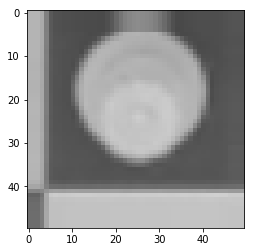

In [66]:
i=0
plt.imshow(x[i])
print(y[i])

In [0]:
a = np.array([
              [1,2,3],
              [4 ,5 ,6],
              [7,8,9],
              [10,11,12]
])

In [51]:
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [52]:
a.shape

(4, 3)

In [56]:
(a == np.array([1,2,3])).T

array([[ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False]])

In [57]:
y.shape

(3392, 13)

In [0]:
y_bin = np.amin((y==np.array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])), axis = 1)

True


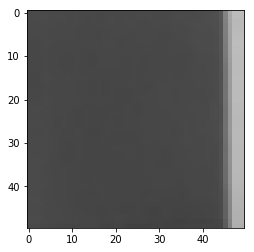

In [74]:
i=18
plt.imshow(x[i])
print(y_bin[i])

In [75]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

epochs = 100
batch_size = 8


def save_bottlebeck_features_bin(x,y):

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    bottleneck_features_train = model.predict(
        x)
    print(bottleneck_features_train.shape)
    np.save(open('./cChess/Weights/bottleneck_features_train_bin.npy', 'wb'),
            bottleneck_features_train)
    np.save(open('./cChess/Weights/bottleneck_labels_bin.npy', 'wb'),
            y)

def train_top_model_bin():
    train_data = np.load(open('./cChess/Weights/bottleneck_features_train_bin.npy', "rb"))
    train_labels = np.load(open('./cChess/Weights/bottleneck_labels_bin.npy',"rb"))

    
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_split=.2)
    model.save_weights("./cChess/Weights/bottleneck512_bin.h5")


save_bottlebeck_features_bin(x,y_bin)
train_top_model_bin()

(3392, 1, 1, 512)
Train on 2713 samples, validate on 679 samples
Epoch 1/100
2713/2713 [==============================] - 2s 808us/step - loss: 0.3079 - acc: 0.8625 - val_loss: 0.1480 - val_acc: 0.9647
Epoch 2/100
2713/2713 [==============================] - 1s 458us/step - loss: 0.1622 - acc: 0.9362 - val_loss: 0.1254 - val_acc: 0.9588
Epoch 3/100
2713/2713 [==============================] - 1s 457us/step - loss: 0.1140 - acc: 0.9576 - val_loss: 0.0861 - val_acc: 0.9588
Epoch 4/100
2713/2713 [==============================] - 1s 446us/step - loss: 0.1044 - acc: 0.9613 - val_loss: 0.1028 - val_acc: 0.9543
Epoch 5/100
2713/2713 [==============================] - 1s 448us/step - loss: 0.0996 - acc: 0.9598 - val_loss: 0.0438 - val_acc: 0.9912
Epoch 6/100
2713/2713 [==============================] - 1s 456us/step - loss: 0.0630 - acc: 0.9801 - val_loss: 0.0309 - val_acc: 0.9926
Epoch 7/100
2713/2713 [==============================] - 1s 446us/step - loss: 0.0588 - acc: 0.9816 - val_loss: 0

In [76]:
!cd cChess && git status

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Weights/

nothing added to commit but untracked files present (use "git add" to track)


In [0]:
!cd cChess && git add .

[master 2bcfc09] trying some convnets architectures (94% accuracy on 13-classes classification and 99-100% accuracy on blank-piece classification on validation data)
 6 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Weights/bottleneck512.h5
 create mode 100644 Weights/bottleneck512_bin.h5
 create mode 100644 Weights/bottleneck_features_train.npy
 create mode 100644 Weights/bottleneck_features_train_bin.npy
 create mode 100644 Weights/bottleneck_labels.npy
 create mode 100644 Weights/bottleneck_labels_bin.npy


In [0]:
!cd cChess && git config --global user.email "afonso.delgado@hotmail.com"
!cd cChess && git config --global user.name "Afonso Delgado"


In [0]:
!cd cChess && git commit -m "trying some convnets architectures (94% accuracy on 13-classes classification and 99-100% accuracy on blank-piece classification on validation data)"

In [81]:
!cd cChess && git push

Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 3.78 MiB | 4.71 MiB/s, done.
Total 8 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/rafaelmcam/cChess.git
   e5ca9ad..2bcfc09  master -> master
